In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, csv
import seaborn as sns

In [3]:
connection = sqlite3.connect("FinalDB.db")
cursor = connection.cursor()

In [5]:
%load_ext sql

In [11]:
%sql sqlite:///FinalDB.db

In [13]:
df1 = pd.read_csv("ChicagoCensusData.csv")
df2 = pd.read_csv("ChicagoPublicSchools.csv")
df3 = pd.read_csv("ChicagoCrimeData.csv")
df1.to_sql("CENSUS_DATA", connection, if_exists = "replace", index = False, method = "multi")
df2.to_sql("CHICAGO_PUBLIC_SCHOOLS", connection, if_exists = "replace", index = False, method = "multi")
df3.to_sql("CHICAGO_CRIME_DATA", connection, if_exists = "replace", index = False, method = "multi")

533

In [72]:
df1.columns, df2.columns, df3.columns

(Index(['COMMUNITY_AREA_NUMBER', 'COMMUNITY_AREA_NAME',
        'PERCENT_OF_HOUSING_CROWDED', 'PERCENT_HOUSEHOLDS_BELOW_POVERTY',
        'PERCENT_AGED_16__UNEMPLOYED',
        'PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA',
        'PERCENT_AGED_UNDER_18_OR_OVER_64', 'PER_CAPITA_INCOME',
        'HARDSHIP_INDEX'],
       dtype='object'),
 Index(['School_ID', 'NAME_OF_SCHOOL', 'Elementary, Middle, or High School',
        'Street_Address', 'City', 'State', 'ZIP_Code', 'Phone_Number', 'Link',
        'Network_Manager', 'Collaborative_Name',
        'Adequate_Yearly_Progress_Made_', 'Track_Schedule',
        'CPS_Performance_Policy_Status', 'CPS_Performance_Policy_Level',
        'HEALTHY_SCHOOL_CERTIFIED', 'Safety_Icon', 'SAFETY_SCORE',
        'Family_Involvement_Icon', 'Family_Involvement_Score',
        'Environment_Icon', 'Environment_Score', 'Instruction_Icon',
        'Instruction_Score', 'Leaders_Icon', 'Leaders_Score', 'Teachers_Icon',
        'Teachers_Score', 'Parent_Engagemen

In [15]:
%%sql 
select name from sqlite_master where type = "table";

 * sqlite:///FinalDB.db
Done.


name
CENSUS_DATA
CHICAGO_PUBLIC_SCHOOLS
CHICAGO_CRIME_DATA


In [18]:
%%sql
pragma table_info([CENSUS_DATA]);

 * sqlite:///FinalDB.db
Done.


cid,name,type,notnull,dflt_value,pk
0,COMMUNITY_AREA_NUMBER,REAL,0,None,0
1,COMMUNITY_AREA_NAME,TEXT,0,None,0
2,PERCENT_OF_HOUSING_CROWDED,REAL,0,None,0
3,PERCENT_HOUSEHOLDS_BELOW_POVERTY,REAL,0,None,0
4,PERCENT_AGED_16__UNEMPLOYED,REAL,0,None,0
5,PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,REAL,0,None,0
6,PERCENT_AGED_UNDER_18_OR_OVER_64,REAL,0,None,0
7,PER_CAPITA_INCOME,INTEGER,0,None,0
8,HARDSHIP_INDEX,REAL,0,None,0


In [21]:
%%sql
select count(*) from pragma_table_info("CENSUS_DATA");

 * sqlite:///FinalDB.db
Done.


count(*)
9


In [24]:
%%sql
select count(*) from CHICAGO_CRIME_DATA;

 * sqlite:///FinalDB.db
Done.


count(*)
533


In [27]:
%%sql
select COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME, PER_CAPITA_INCOME from CENSUS_DATA where PER_CAPITA_INCOME < 11000;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PER_CAPITA_INCOME
26.0,West Garfield Park,10934
30.0,South Lawndale,10402
37.0,Fuller Park,10432
54.0,Riverdale,8201


In [30]:
%%sql
select distinct(PRIMARY_TYPE) from CHICAGO_CRIME_DATA;

 * sqlite:///FinalDB.db
Done.


PRIMARY_TYPE
THEFT
BATTERY
CRIMINAL DAMAGE
NARCOTICS
OTHER OFFENSE
ASSAULT
BURGLARY
MOTOR VEHICLE THEFT
DECEPTIVE PRACTICE
ROBBERY


In [33]:
%%sql
select case_number, primary_type, description from CHICAGO_CRIME_DATA where primary_type like "%child%" or
description like "%child%";

 * sqlite:///FinalDB.db
Done.


CASE_NUMBER,PRIMARY_TYPE,DESCRIPTION
HN567387,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR
HR391350,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR
HM768251,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER
HT394616,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER
HN144152,KIDNAPPING,CHILD ABDUCTION/STRANGER


In [36]:
%%sql
select * from CHICAGO_CRIME_DATA where PRIMARY_TYPE	= "KIDNAPPING" and description like "%child%";

 * sqlite:///FinalDB.db
Done.


ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
5276766,HN144152,2007-01-26,050XX W VAN BUREN ST,1792,KIDNAPPING,CHILD ABDUCTION/STRANGER,STREET,0,0,1533,15,29.0,25.0,20,1143050.0,1897546.0,2007,41.87490841,-87.75024931,"(41.874908413, -87.750249307)"


In [39]:
%%sql
select distinct(LOCATION_DESCRIPTION) from CHICAGO_CRIME_DATA;

 * sqlite:///FinalDB.db
Done.


LOCATION_DESCRIPTION
SMALL RETAIL STORE
OTHER
NURSING HOME/RETIREMENT HOME
RESIDENCE
ALLEY
PARKING LOT/GARAGE(NON.RESID.)
STREET
GROCERY FOOD STORE
DEPARTMENT STORE
BAR OR TAVERN


In [42]:
%%sql
select distinct(PRIMARY_TYPE) from CHICAGO_CRIME_DATA where LOCATION_DESCRIPTION like "%school%";

 * sqlite:///FinalDB.db
Done.


PRIMARY_TYPE
BATTERY
CRIMINAL DAMAGE
NARCOTICS
ASSAULT
CRIMINAL TRESPASS
PUBLIC PEACE VIOLATION


In [45]:
%%sql
select name from pragma_table_info("CHICAGO_PUBLIC_SCHOOLS");

 * sqlite:///FinalDB.db
Done.


name
School_ID
NAME_OF_SCHOOL
"Elementary, Middle, or High School"
Street_Address
City
State
ZIP_Code
Phone_Number
Link
Network_Manager


In [48]:
%%sql
select "Elementary, Middle, or High School", avg(SAFETY_SCORE) from CHICAGO_PUBLIC_SCHOOLS group by "Elementary, Middle, or High School";

 * sqlite:///FinalDB.db
Done.


"Elementary, Middle, or High School",avg(SAFETY_SCORE)
ES,49.52038369304557
HS,49.62352941176471
MS,48.0


In [52]:
%%sql
select community_area_name, percent_households_below_poverty from CENSUS_DATA order by percent_households_below_poverty desc limit 5;



 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,PERCENT_HOUSEHOLDS_BELOW_POVERTY
Riverdale,56.5
Fuller Park,51.2
Englewood,46.6
North Lawndale,43.1
East Garfield Park,42.4


In [55]:
%%sql
select community_area_number, count(*) as number_of_crime from CHICAGO_CRIME_DATA where COMMUNITY_AREA_NUMBER !="None" group by community_area_number order by number_of_crime desc;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,number_of_crime
25.0,43
23.0,22
68.0,21
29.0,16
28.0,16
8.0,15
71.0,14
24.0,13
67.0,12
66.0,12


In [58]:
%%sql
select c.community_area_number, community_area_name, count(ID) as count from CHICAGO_CRIME_DATA C, CENSUS_DATA CS 
where C.community_area_number = cs.community_area_number and c.COMMUNITY_AREA_NUMBER !="None" 
group by c.community_area_number order by count desc limit 5;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,count
25.0,Austin,43
23.0,Humboldt park,22
68.0,Englewood,21
29.0,North Lawndale,16
28.0,Near West Side,16


In [61]:
%%sql
select community_area_name, hardship_index from CENSUS_DATA where hardship_index = (select max(hardship_index) from CENSUS_DATA);

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,HARDSHIP_INDEX
Riverdale,98.0


In [64]:
%%sql
select CS.COMMUNITY_AREA_NAME, count(ID) as COUNT from CENSUS_DATA CS, CHICAGO_CRIME_DATA C
where CS.COMMUNITY_AREA_NUMBER = C.COMMUNITY_AREA_NUMBER and  C.COMMUNITY_AREA_NUMBER != "None"
group by C.COMMUNITY_AREA_NUMBER
order by COUNT desc limit 5;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME,COUNT
Austin,43
Humboldt park,22
Englewood,21
North Lawndale,16
Near West Side,16


In [67]:
%%sql
select community_area_name from CENSUS_DATA 
where community_area_number in 
(select community_area_number from CHICAGO_CRIME_DATA 
where COMMUNITY_AREA_NUMBER != "None"
group by community_area_number 
order by count(ID) desc limit 5);

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NAME
Humboldt park
Austin
Near West Side
North Lawndale
Englewood


In [70]:
%%sql
select community_area_number from CHICAGO_CRIME_DATA 
where COMMUNITY_AREA_NUMBER != "None"
group by community_area_number 
order by count(ID) desc limit 5;

 * sqlite:///FinalDB.db
Done.


COMMUNITY_AREA_NUMBER
25.0
23.0
68.0
29.0
28.0


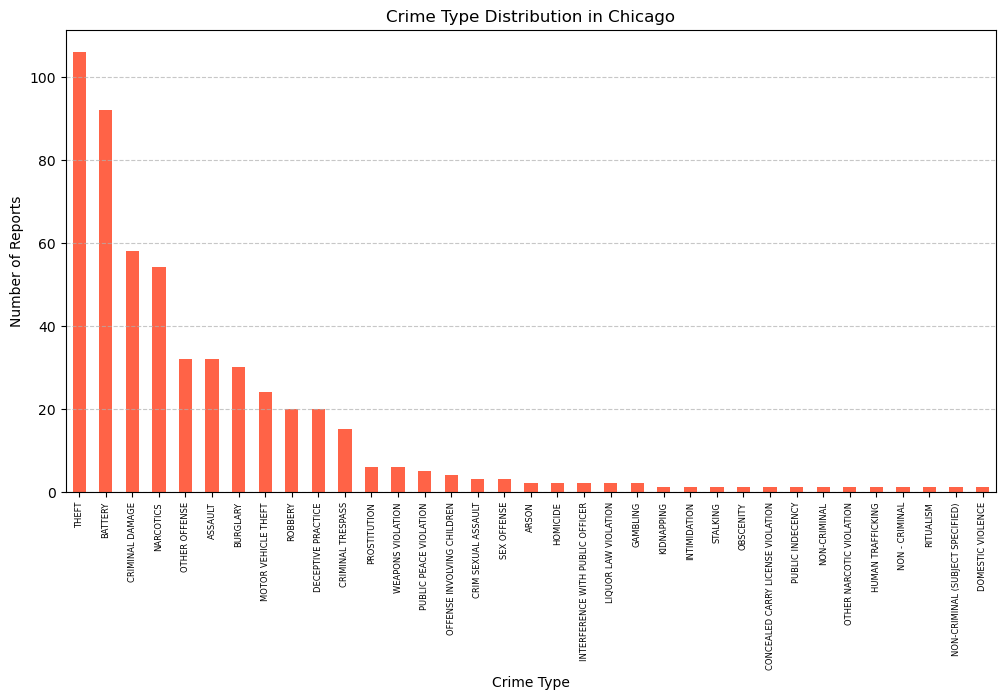

In [78]:
crime_data = pd.read_sql("SELECT PRIMARY_TYPE FROM CHICAGO_CRIME_DATA", connection)
crime_counts = crime_data["PRIMARY_TYPE"].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
crime_counts.plot(kind="bar", color="tomato")
plt.xlabel("Crime Type")
plt.ylabel("Number of Reports")
plt.title("Crime Type Distribution in Chicago")
plt.xticks(rotation=90, fontsize=6)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

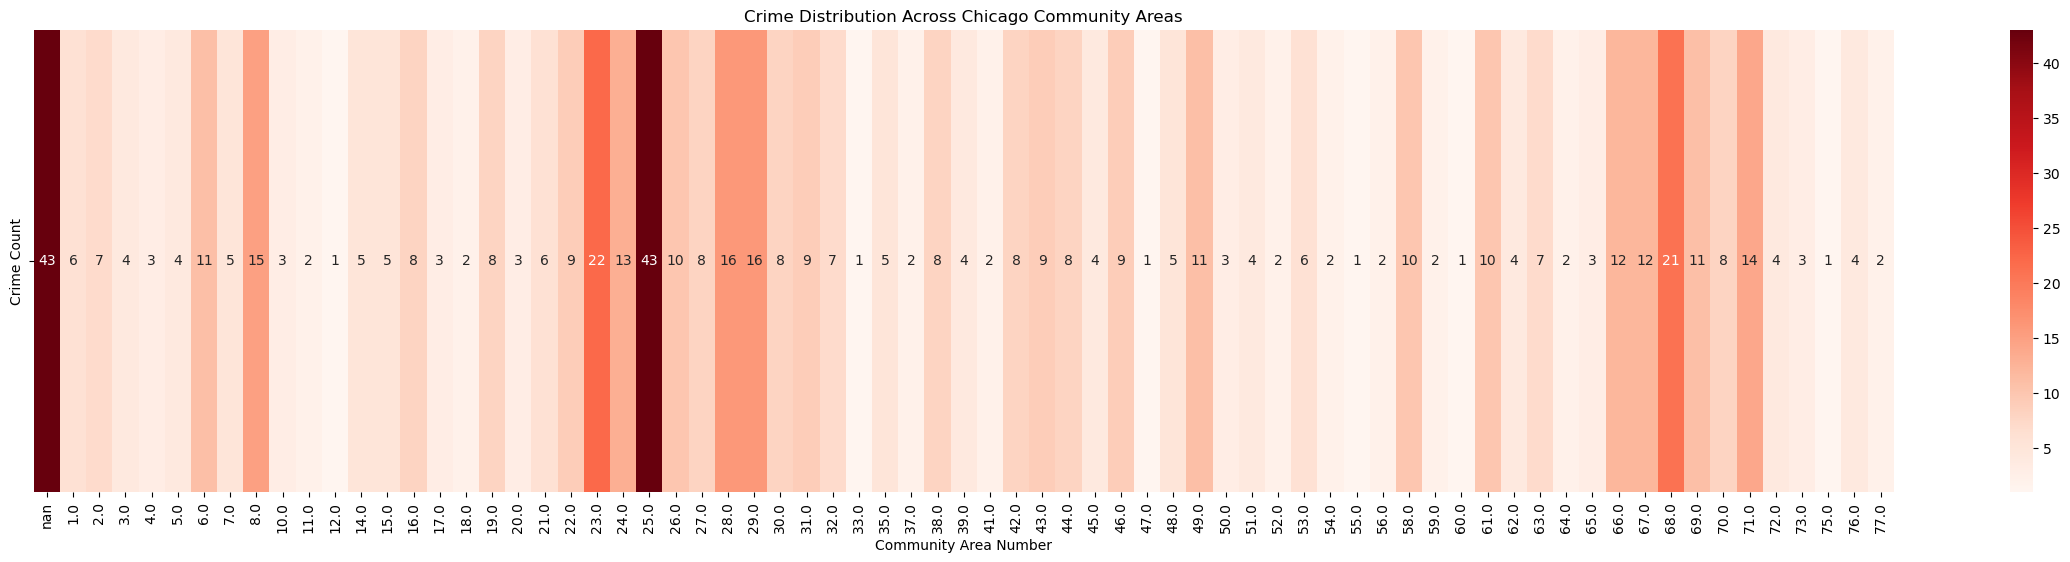

In [100]:
crime_area = pd.read_sql("SELECT COMMUNITY_AREA_NUMBER, COUNT(*) as Crime_Count FROM CHICAGO_CRIME_DATA GROUP BY COMMUNITY_AREA_NUMBER", connection)

# Plot heatmap
plt.figure(figsize=(30, 6))
sns.heatmap(crime_area.set_index("COMMUNITY_AREA_NUMBER").T, cmap="Reds", annot=True, fmt="d")
plt.title("Crime Distribution Across Chicago Community Areas")
plt.xlabel("Community Area Number")
plt.yticks(ticks=[0.5], labels=["Crime Count"])
plt.show()

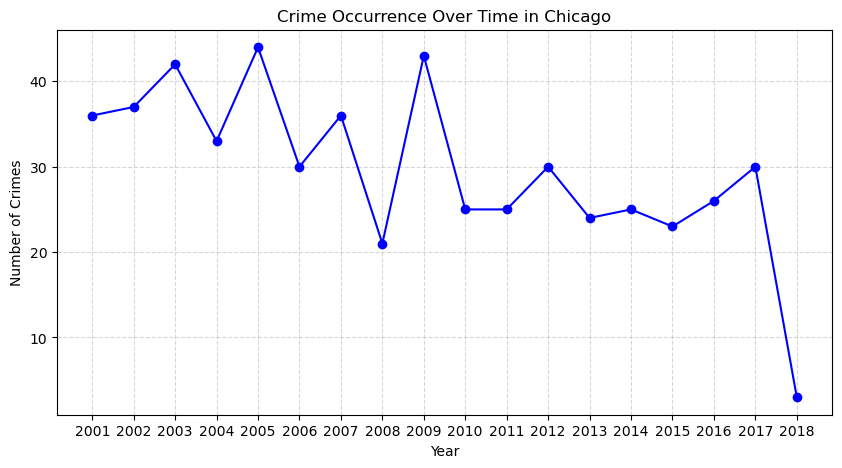

In [108]:
crime_time = pd.read_sql("SELECT YEAR, COUNT(*) as Crime_Count FROM CHICAGO_CRIME_DATA GROUP BY YEAR ORDER BY YEAR", connection)

plt.figure(figsize=(10, 5))
plt.plot(crime_time["YEAR"], crime_time["Crime_Count"], marker="o", linestyle="-", color="blue")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.xticks(range(2001,2019))
plt.title("Crime Occurrence Over Time in Chicago")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

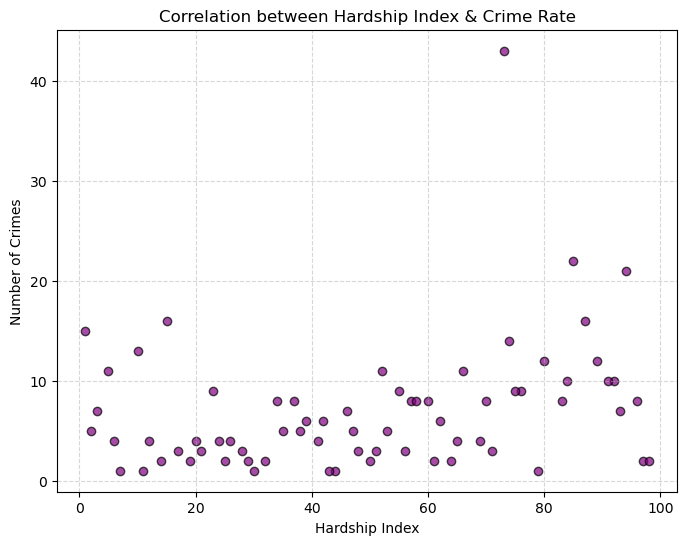

In [110]:
hardship_crime = pd.read_sql("""
SELECT CENSUS_DATA.COMMUNITY_AREA_NUMBER, HARDSHIP_INDEX, COUNT(CHICAGO_CRIME_DATA.ID) as Crime_Count
FROM CENSUS_DATA
JOIN CHICAGO_CRIME_DATA ON CENSUS_DATA.COMMUNITY_AREA_NUMBER = CHICAGO_CRIME_DATA.COMMUNITY_AREA_NUMBER
GROUP BY CENSUS_DATA.COMMUNITY_AREA_NUMBER
""", connection)

plt.figure(figsize=(8, 6))
plt.scatter(hardship_crime["HARDSHIP_INDEX"], hardship_crime["Crime_Count"], alpha=0.7, c="purple", edgecolors="black")
plt.xlabel("Hardship Index")
plt.ylabel("Number of Crimes")
plt.title("Correlation between Hardship Index & Crime Rate")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

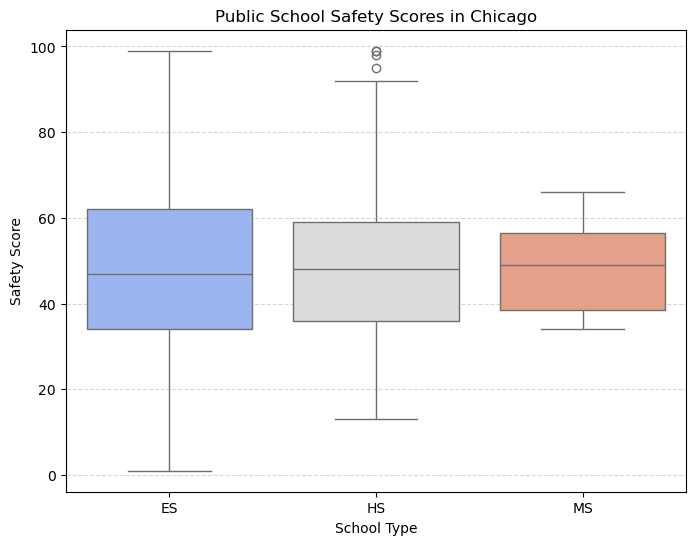

In [114]:
school_safety = pd.read_sql("SELECT `Elementary, Middle, or High School`, SAFETY_SCORE FROM CHICAGO_PUBLIC_SCHOOLS", connection)

plt.figure(figsize=(8, 6))
sns.boxplot(x="Elementary, Middle, or High School", y="SAFETY_SCORE", data=school_safety, hue="Elementary, Middle, or High School", palette="coolwarm")
plt.xlabel("School Type")
plt.ylabel("Safety Score")
plt.title("Public School Safety Scores in Chicago")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()